In [94]:
#Load the model
import json
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [95]:
MODELS_DIR = '../models'
MODEL_FILE_PATH=f'{MODELS_DIR}/classification_model_06_0.872.keras'
CLASSES_JSON_PATH = f'{MODELS_DIR}/class_indices.json'
TARGET_SIZE = (320, 320)

In [96]:
#Defining the same preprocessing functions that were used during training
from PIL import Image
import numpy as np

def resize_image(image_array):
    # Convert the numpy array to a PIL Image
    img = Image.fromarray(np.uint8(image_array))  # Convert to PIL Image

    # Get original dimensions
    orig_width, orig_height = img.size

    # Calculate the aspect ratio
    aspect_ratio = orig_width / orig_height

    # Resize while maintaining the aspect ratio
    if aspect_ratio > 1:  # Width is greater than height
        new_width = TARGET_SIZE[0]
        new_height = int(TARGET_SIZE[0] / aspect_ratio)
    else:
        new_height = TARGET_SIZE[1]
        new_width = int(TARGET_SIZE[1] * aspect_ratio)

    # Resize the image to the new dimensions
    img = img.resize((new_width, new_height), Image.LANCZOS)

    # Create a new image with a white background
    new_img = Image.new("RGB", TARGET_SIZE, (255, 255, 255))  # White padding
    pad_x = (TARGET_SIZE[0] - new_width) // 2
    pad_y = (TARGET_SIZE[1] - new_height) // 2

    # Paste the resized image onto the new padded image
    new_img.paste(img, (pad_x, pad_y))

    # Convert the final image back to a numpy array and return
    return np.array(new_img)  



In [97]:
def resize_and_preprocess_image(image_array):
    # Resize the image
    resized_image = resize_image(image_array)

    # Apply the MobileNetV2 preprocess function
    return preprocess_input(np.array(resized_image))  

In [98]:
model = keras.models.load_model(MODEL_FILE_PATH)

In [99]:
#test on a small image because the small images are the ones saved locally at this point
image_path='../dataset/test-images/2241.jpg'

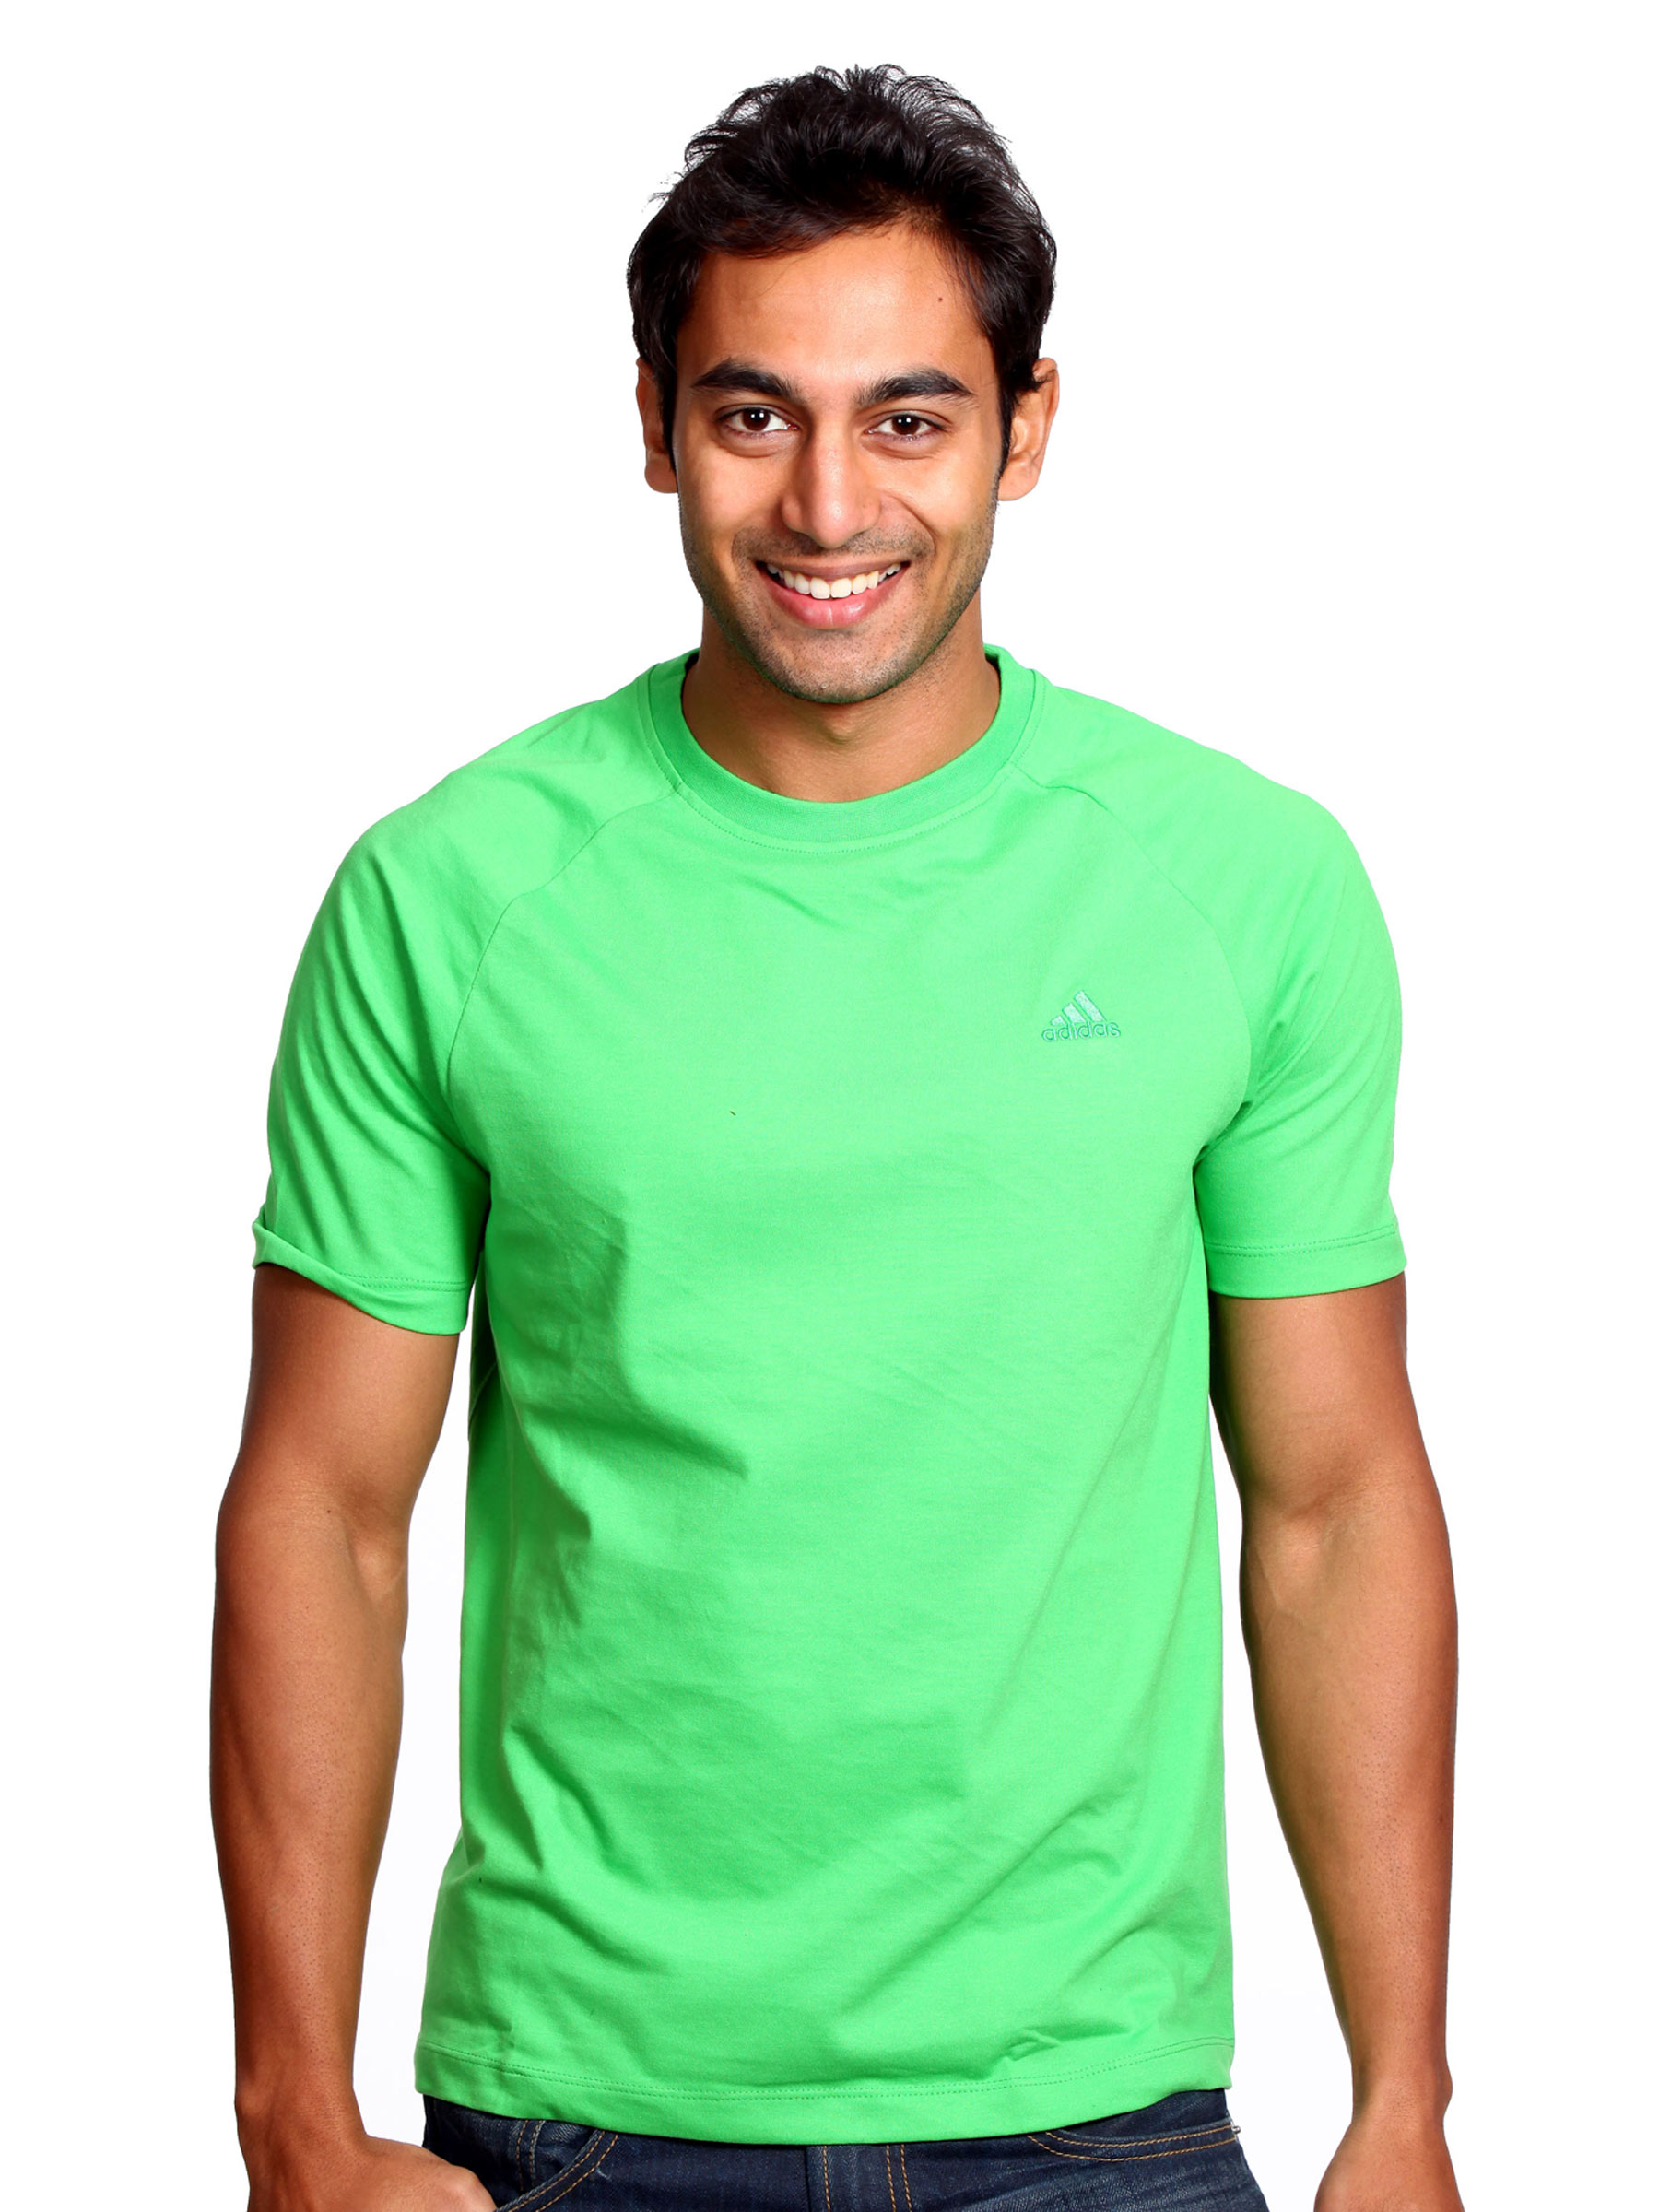

In [100]:
img=load_img(image_path)
img

In [101]:
x = img_to_array(img)
x.shape

(2400, 1800, 3)

In [102]:
x_resized = resize_image(x)
x_resized.shape

(320, 320, 3)

In [103]:
X = np.array([x_resized])
X.shape

(1, 320, 320, 3)

In [104]:
X = preprocess_input(X)

In [105]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [106]:
#load classes from json file
class_indices={}
with open(CLASSES_JSON_PATH, 'r') as json_file:
    class_indices = json.load(json_file)
    print(class_indices)

{'Accessory Gift Set': 0, 'Baby Dolls': 1, 'Backpacks': 2, 'Bangle': 3, 'Basketballs': 4, 'Bath Robe': 5, 'Beauty Accessory': 6, 'Belts': 7, 'Blazers': 8, 'Body Lotion': 9, 'Booties': 10, 'Boxers': 11, 'Bra': 12, 'Bracelet': 13, 'Briefs': 14, 'Camisoles': 15, 'Capris': 16, 'Caps': 17, 'Casual Shoes': 18, 'Churidar': 19, 'Clothing Set': 20, 'Clutches': 21, 'Compact': 22, 'Concealer': 23, 'Cufflinks': 24, 'Deodorant': 25, 'Dresses': 26, 'Duffel Bag': 27, 'Dupatta': 28, 'Earrings': 29, 'Eye Cream': 30, 'Eyeshadow': 31, 'Face Moisturisers': 32, 'Face Scrub and Exfoliator': 33, 'Face Wash and Cleanser': 34, 'Flats': 35, 'Flip Flops': 36, 'Footballs': 37, 'Formal Shoes': 38, 'Foundation and Primer': 39, 'Fragrance Gift Set': 40, 'Free Gifts': 41, 'Gloves': 42, 'Hair Colour': 43, 'Handbags': 44, 'Headband': 45, 'Heels': 46, 'Highlighter and Blush': 47, 'Innerwear Vests': 48, 'Jackets': 49, 'Jeans': 50, 'Jeggings': 51, 'Jewellery Set': 52, 'Jumpsuit': 53, 'Kajal and Eyeliner': 54, 'Kurta Sets'

In [107]:
# Obtén los índices de las clases ordenados por probabilidad, de mayor a menor
predictions=preds[0]
sorted_indices = np.argsort(predictions)[::-1]  # Ordena en orden descendente

# Obtén las 5 mejores predicciones con sus etiquetas
top_n = 5
top_classes = []
top_scores = []

index_to_class = {index: label for label, index in class_indices.items()}

for i in range(top_n):
    index = sorted_indices[i]
    class_label = index_to_class[index]  # Accede al nombre de la clase usando su índice
    score = predictions[index]  # Accede al score correspondiente
    top_classes.append((class_label, score))

# Imprimir las 5 mejores predicciones
print("Top 5 Predictions:")
for class_label, score in top_classes:
    print(f"{class_label}: {score:.4f}")

Top 5 Predictions:
Tshirts: 0.9324
Innerwear Vests: 0.0554
Tops: 0.0075
Night suits: 0.0015
Tunics: 0.0012


In [108]:
# Running prediction for a second image

In [142]:
image_path='../dataset/test-images/27045.jpg'

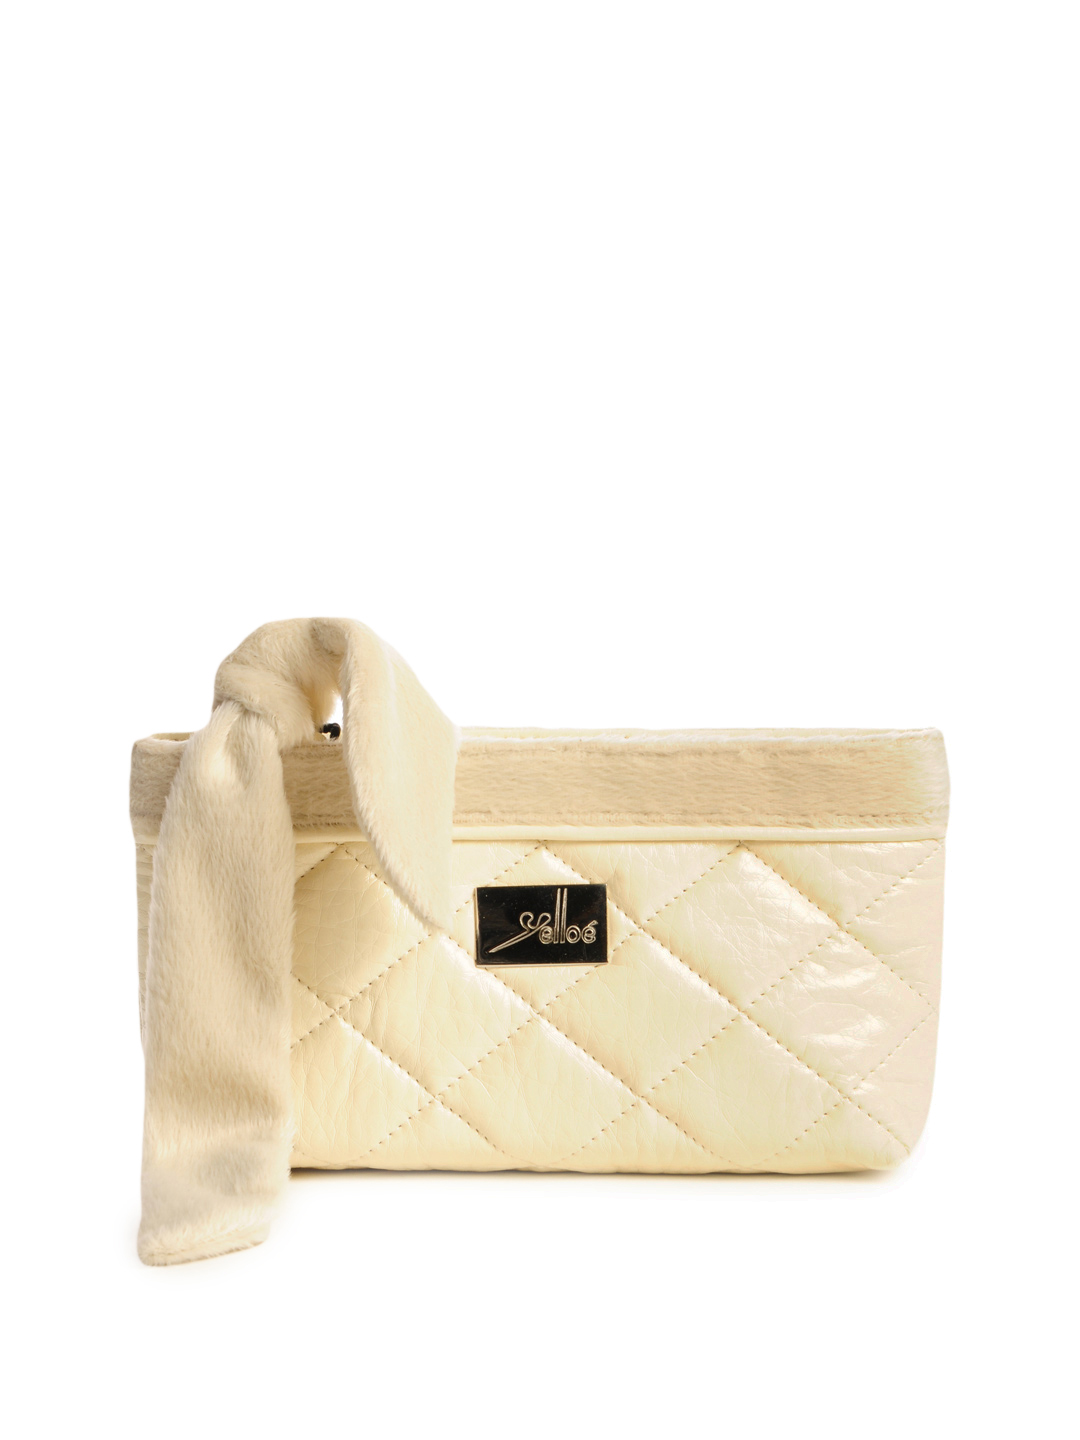

In [143]:
img=load_img(image_path)
img

In [144]:
x = img_to_array(img)
x_resized = resize_image(x)
X = np.array([x_resized])
X.shape

(1, 320, 320, 3)

In [145]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [146]:
# Obtén los índices de las clases ordenados por probabilidad, de mayor a menor
predictions=preds[0]
sorted_indices = np.argsort(predictions)[::-1]  # Ordena en orden descendente

# Obtén las 5 mejores predicciones con sus etiquetas
top_n = 5
top_classes = []
top_scores = []

index_to_class = {index: label for label, index in class_indices.items()}

for i in range(top_n):
    index = sorted_indices[i]
    class_label = index_to_class[index]  # Accede al nombre de la clase usando su índice
    score = predictions[index]  # Accede al score correspondiente
    top_classes.append((class_label, score))

# Imprimir las 5 mejores predicciones
print("Top 5 Predictions:")
for class_label, score in top_classes:
    print(f"{class_label}: {score:.4f}")



Top 5 Predictions:
Shirts: 0.3465
Wallets: 0.2051
Handbags: 0.1434
Perfume and Body Mist: 0.0841
Clutches: 0.0551


In [147]:
preds[0][101]

np.float32(0.0032490145)